In [5]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np

import cv2
from matplotlib import pylab as plt

import keras
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

from utils import rgb2tensor,grey2rgb,preprocess_mnist,plot_list

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


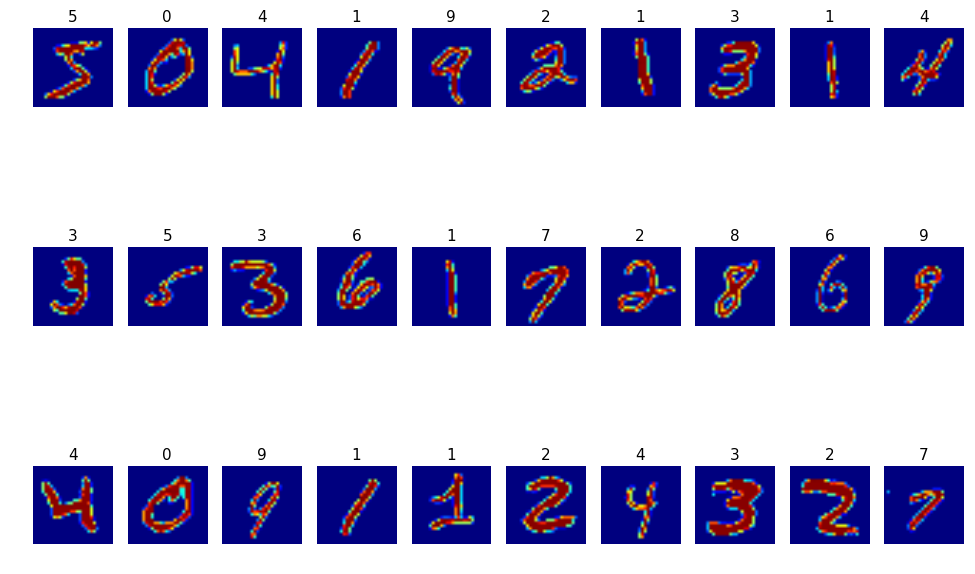

In [6]:
(X_train, y_train),(X_test, y_test)= mnist.load_data()

plot_list(img_list= X_train[:30],
          labels = y_train[:30],
          cols_nr=10,
          plot_config = None)

In [7]:
X_train = np.expand_dims(X_train,axis = 1).transpose(0,2,3,1)/255.
X_test = np.expand_dims(X_test,axis = 1).transpose(0,2,3,1)/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
class PlotPredictionCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, batch, logs={}):
        predicted_labels = model.predict(X_test[:10])
        predicted_labels = np.argmax(predicted_labels,axis = 1)
        plot_list(img_list= X_test[:10,:,:,0],
                  labels = predicted_labels,
                  cols_nr=10,
                  plot_config = None)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.2808 - acc: 0.9100

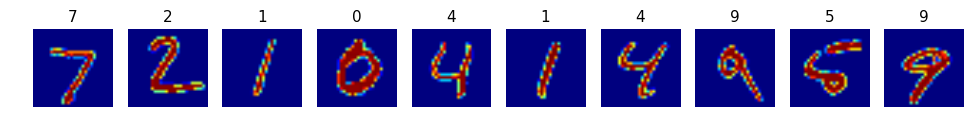

60000/60000 [==============================] - 248s - loss: 0.2805 - acc: 0.9101 - val_loss: 0.0604 - val_acc: 0.9802
Epoch 2/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0776 - acc: 0.9765

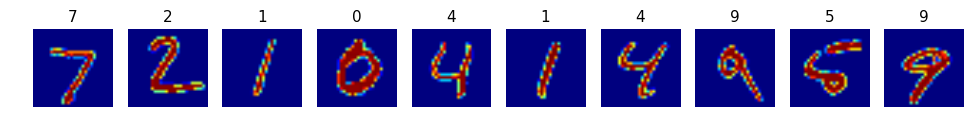

60000/60000 [==============================] - 238s - loss: 0.0777 - acc: 0.9765 - val_loss: 0.0400 - val_acc: 0.9863
Epoch 3/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0560 - acc: 0.9829

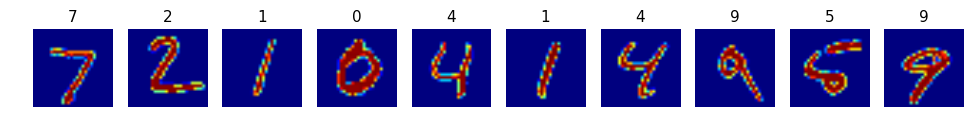

60000/60000 [==============================] - 230s - loss: 0.0559 - acc: 0.9829 - val_loss: 0.0299 - val_acc: 0.9897
Epoch 4/20
48256/60000 [=======================>......] - ETA: 41s - loss: 0.0430 - acc: 0.9874

In [ ]:
from keras.layers import Input, Dense, Conv2D, Flatten, Dropout
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint,Callback

NB_CLASSES = 10
NB_EPOCHS = 20
BATCH_SIZE = 128
MODEL_PATH = os.path.join("models","nm8rs.h5")

inputs = Input(shape=(28,28,1))

x = Conv2D(16,3,3, activation='relu',border_mode="same",name='block1_conv')(inputs)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

x = Conv2D(64,3,3, activation='relu',border_mode="same",name='block2_conv')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

x = Conv2D(128,3,3, activation='relu',border_mode="same",name='block3_conv')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

x = Flatten(name='flatten')(x)
x = Dense(256, activation='relu',name='fc1')(x)
x = Dropout(0.5)(x)

predictions = Dense(10, activation='softmax',name='predictions')(x)

model = Model(input=inputs, output=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

plot_predictions = PlotPredictionCallback()
model_checkpoint = ModelCheckpoint(MODEL_PATH, monitor='val_loss', verbose=0, 
                                   save_best_only=True, save_weights_only=False, mode='auto')
model.fit(X_train,y_train, 
          validation_data = [X_test,y_test],
          nb_epoch = NB_EPOCHS,
          batch_size = BATCH_SIZE,
          verbose = 1,
          callbacks = [plot_predictions,model_checkpoint]) 